In [1]:
# Import dependencies
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Extract the inflation interest unemployment.csv Data

In [2]:
# Read the data into a Pandas DataFrame.
info_df = pl.read_csv('Resources/inflation interest unemployment.csv')
info_df.head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
str,i64,f64,f64,f64,str,f64,f64,f64,str,str,str,str
"""Afghanistan""",1970,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1971,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1972,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1973,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1974,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""


In [3]:
info_df.filter(info_df['country'] == 'United States').head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
str,i64,f64,f64,f64,str,f64,f64,f64,str,str,str,str
"""United States""",1970,5.838255,5.60217,2.1854,null,7.91,4.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1971,4.292767,5.069167,0.622605,null,5.723333,5.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1972,3.272278,4.322751,0.887229,null,5.248333,5.6,null,"""USA""","""US""",null,"""High income"""
"""United States""",1973,6.17776,5.479881,2.409735,null,8.021667,4.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1974,11.054805,8.998695,1.651064,null,10.798333,5.6,null,"""USA""","""US""",null,"""High income"""


In [4]:
info_df_remove_column = info_df.drop(['iso3c', 'iso2c','adminregion','incomeLevel'])
info_df_remove_column.head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
str,i64,f64,f64,f64,str,f64,f64,f64
"""Afghanistan""",1970,null,null,null,null,null,null,null
"""Afghanistan""",1971,null,null,null,null,null,null,null
"""Afghanistan""",1972,null,null,null,null,null,null,null
"""Afghanistan""",1973,null,null,null,null,null,null,null
"""Afghanistan""",1974,null,null,null,null,null,null,null


In [5]:
filtered_df = info_df_remove_column.filter((info_df_remove_column['country'] == 'United States') | (info_df_remove_column['country'] == 'United Kingdom'))
filtered_df

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
str,i64,f64,f64,f64,str,f64,f64,f64
"""United Kingdom…",1970,6.366568,5.539735,1.620494,"""5.208333333333…",7.25,null,null
"""United Kingdom…",1971,9.444837,7.985625,-0.449712,"""3.833333333333…",7.5,3.3,null
"""United Kingdom…",1972,7.071098,7.188252,0.290842,"""4.145833333333…",7.5,3.7,null
"""United Kingdom…",1973,9.196033,8.414879,-0.382677,"""8.020833333333…",8.0,2.6,null
"""United Kingdom…",1974,16.044011,15.059213,-5.266169,"""9.5""",9.0,2.6,null
"""United Kingdom…",1975,24.207288,25.770728,-12.167407,"""7.083333333333…",10.467692,4.0,null
"""United Kingdom…",1976,16.559523,15.113567,-3.48579,"""7.541666666666…",11.10095,5.5,null
"""United Kingdom…",1977,15.840267,13.710494,-4.220039,"""4.895833333333…",8.911867,5.8,null
"""United Kingdom…",1978,8.263141,11.457547,-2.121343,"""6.083333333333…",9.09315,5.7,null


In [6]:
filtered_df.write_csv('output.csv')

In [7]:
us_inflation = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Inflation, consumer prices (annual %)']]
# Rename columns
us_inflation = us_inflation.rename({'Inflation, consumer prices (annual %)': 'Inflation', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(us_inflation)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 5.838255  │
│ 1971 ┆ 4.292767  │
│ 1972 ┆ 3.272278  │
│ 1973 ┆ 6.17776   │
│ …    ┆ …         │
│ 2018 ┆ 2.442583  │
│ 2019 ┆ 1.81221   │
│ 2020 ┆ 1.233584  │
│ 2021 ┆ 4.697859  │
└──────┴───────────┘


In [8]:
# Assuming us_real_int_rate is your DataFrame
us_inflation = us_inflation.filter(us_inflation['Inflation'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(us_inflation)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 5.838255  │
│ 1971 ┆ 4.292767  │
│ 1972 ┆ 3.272278  │
│ 1973 ┆ 6.17776   │
│ …    ┆ …         │
│ 2018 ┆ 2.442583  │
│ 2019 ┆ 1.81221   │
│ 2020 ┆ 1.233584  │
│ 2021 ┆ 4.697859  │
└──────┴───────────┘


In [9]:
us_inflation2 = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Inflation, consumer prices (annual %)']]
# Rename columns
us_inflation2 = us_inflation2.rename({'Inflation, consumer prices (annual %)': 'Inflation', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(us_inflation2)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 6.366568  │
│ 1971 ┆ 9.444837  │
│ 1972 ┆ 7.071098  │
│ 1973 ┆ 9.196033  │
│ …    ┆ …         │
│ 2018 ┆ 2.29284   │
│ 2019 ┆ 1.738105  │
│ 2020 ┆ 0.989487  │
│ 2021 ┆ 2.518371  │
└──────┴───────────┘


In [10]:
# Assuming us_real_int_rate is your DataFrame
us_inflation2 = us_inflation2.filter(us_inflation2['Inflation'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(us_inflation2)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 6.366568  │
│ 1971 ┆ 9.444837  │
│ 1972 ┆ 7.071098  │
│ 1973 ┆ 9.196033  │
│ …    ┆ …         │
│ 2018 ┆ 2.29284   │
│ 2019 ┆ 1.738105  │
│ 2020 ┆ 0.989487  │
│ 2021 ┆ 2.518371  │
└──────┴───────────┘


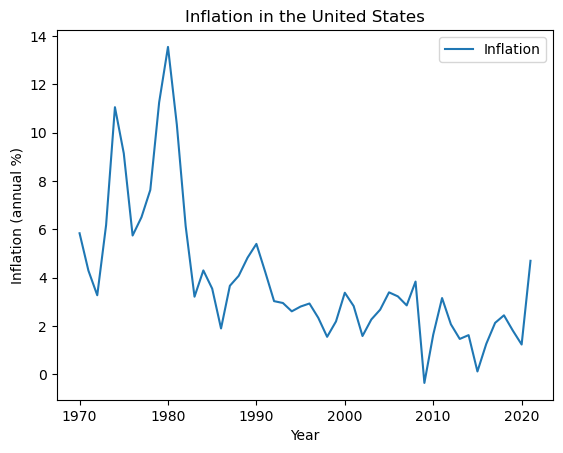

In [11]:
#US Inflation Visualization Line Graph
us_inflation.to_pandas().plot(x='Year', y='Inflation', kind='line', title='Inflation in the United States', ylabel='Inflation (annual %)')
plt.show()

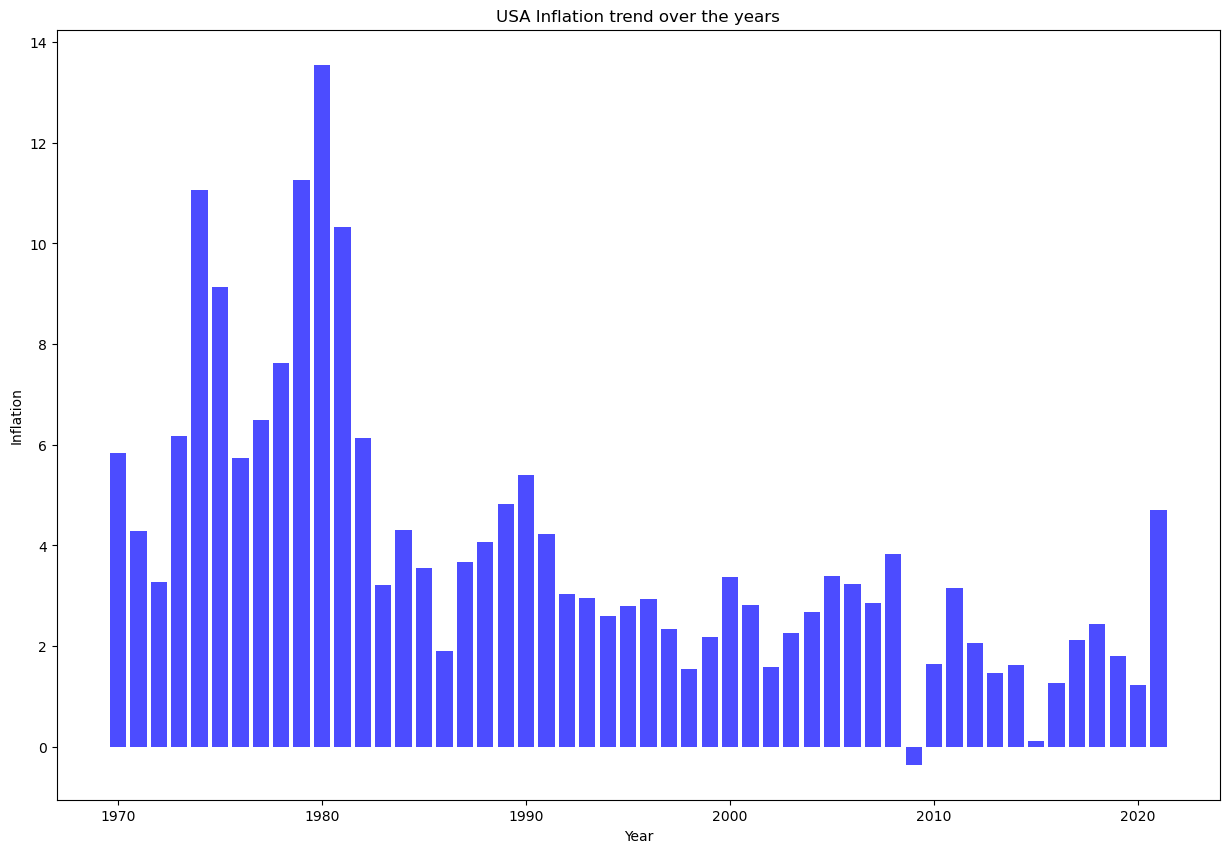

In [12]:
plt.figure(figsize=(15, 10))
# Plotting a bar graph using polars and matplotlib
plt.bar(us_inflation['Year'], us_inflation['Inflation'], color='blue', alpha=0.7)
# Set title and labels
plt.title('USA Inflation trend over the years')
plt.xlabel('Year')
plt.ylabel('Inflation')
# Show the plot
plt.show()

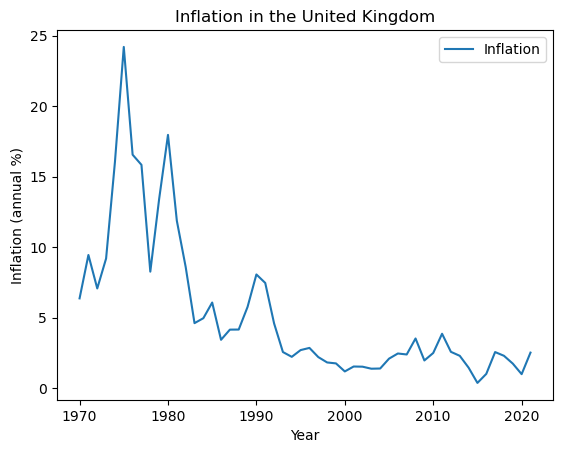

In [13]:
#UK Inflation Visualization Line Graph
us_inflation2.to_pandas().plot(x='Year', y='Inflation', kind='line', title='Inflation in the United Kingdom', ylabel='Inflation (annual %)')
plt.show()

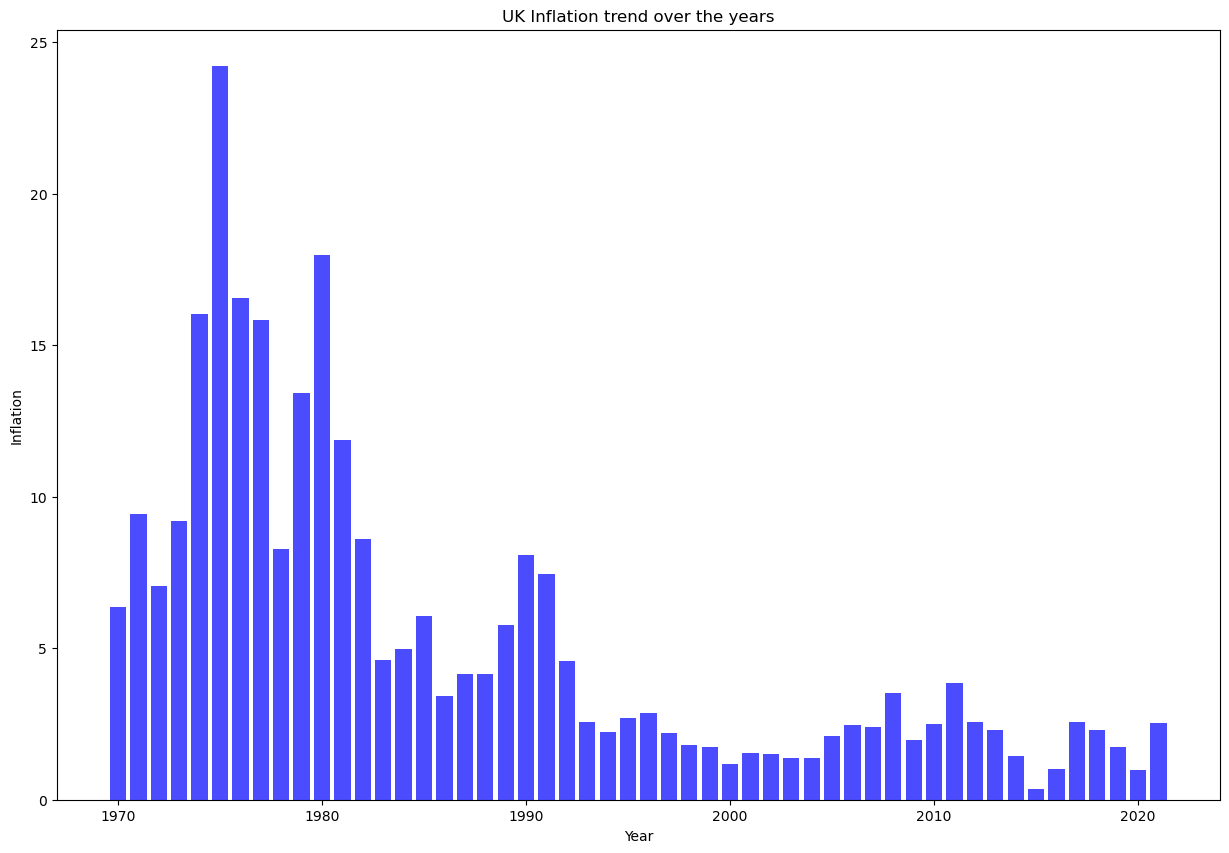

In [14]:
plt.figure(figsize=(15, 10))
# Plotting a bar graph using polars and matplotlib
plt.bar(us_inflation2['Year'], us_inflation2['Inflation'], color='blue', alpha=0.7)
# Set title and labels
plt.title('UK Inflation trend over the years')
plt.xlabel('Year')
plt.ylabel('Inflation')
# Show the plot
plt.show()

In [15]:
us_real_int_rate = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Real interest rate (%)']]
# Rename columns
us_real_int_rate = us_real_int_rate.rename({'Real interest rate (%)': 'Interest %', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(us_real_int_rate)

shape: (52, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 2.1854     │
│ 1971 ┆ 0.622605   │
│ 1972 ┆ 0.887229   │
│ 1973 ┆ 2.409735   │
│ …    ┆ …          │
│ 2018 ┆ 2.444494   │
│ 2019 ┆ 3.43601    │
│ 2020 ┆ 2.311111   │
│ 2021 ┆ null       │
└──────┴────────────┘


In [16]:
# Assuming us_real_int_rate is your DataFrame
us_real_int_rate = us_real_int_rate.filter(us_real_int_rate['Interest %'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(us_real_int_rate)

shape: (51, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 2.1854     │
│ 1971 ┆ 0.622605   │
│ 1972 ┆ 0.887229   │
│ 1973 ┆ 2.409735   │
│ …    ┆ …          │
│ 2017 ┆ 2.175694   │
│ 2018 ┆ 2.444494   │
│ 2019 ┆ 3.43601    │
│ 2020 ┆ 2.311111   │
└──────┴────────────┘


In [17]:
us_real_int_rate2 = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Real interest rate (%)']]
# Rename columns
us_real_int_rate2 = us_real_int_rate2.rename({'Real interest rate (%)': 'Interest %', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(us_real_int_rate2)

shape: (52, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 1.620494   │
│ 1971 ┆ -0.449712  │
│ 1972 ┆ 0.290842   │
│ 1973 ┆ -0.382677  │
│ …    ┆ …          │
│ 2018 ┆ null       │
│ 2019 ┆ null       │
│ 2020 ┆ null       │
│ 2021 ┆ null       │
└──────┴────────────┘


In [18]:
# Assuming us_real_int_rate is your DataFrame
us_real_int_rate2 = us_real_int_rate2.filter(us_real_int_rate2['Interest %'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(us_real_int_rate2)

shape: (45, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 1.620494   │
│ 1971 ┆ -0.449712  │
│ 1972 ┆ 0.290842   │
│ 1973 ┆ -0.382677  │
│ …    ┆ …          │
│ 2011 ┆ -1.535587  │
│ 2012 ┆ -1.094246  │
│ 2013 ┆ -1.700725  │
│ 2014 ┆ -1.073299  │
└──────┴────────────┘


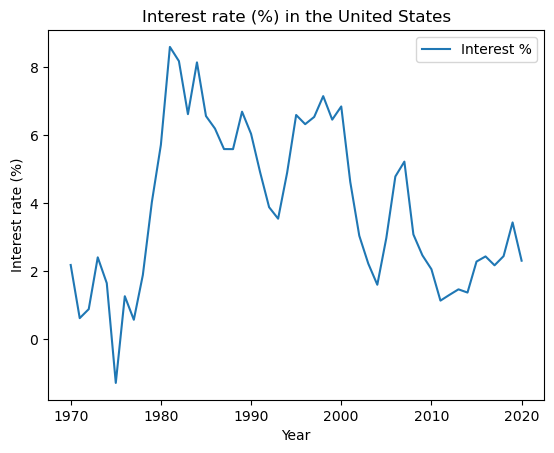

In [19]:
#US Real Interest % Visualization Line Graph
us_real_int_rate.to_pandas().plot(x='Year', y='Interest %', kind='line', title='Interest rate (%) in the United States', ylabel='Interest rate (%)')
plt.show()

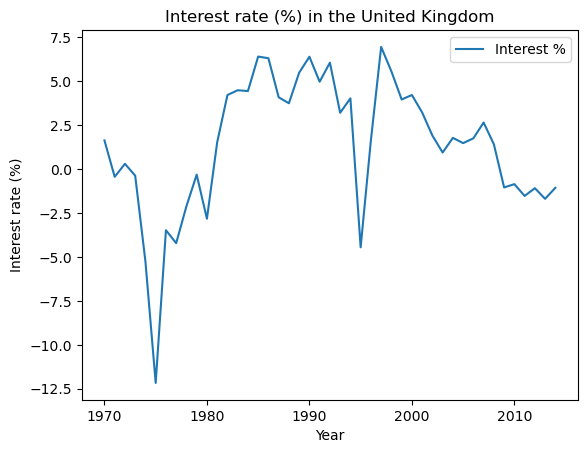

In [20]:
#UK Real Interest % Visualization Line Graph
us_real_int_rate2.to_pandas().plot(x='Year', y='Interest %', kind='line', title='Interest rate (%) in the United Kingdom', ylabel='Interest rate (%)')
plt.show()

In [21]:
us_Unemployment = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Unemployment, total (% of total labor force) (national estimate)']]
# Rename columns
us_Unemployment = us_Unemployment.rename({'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(us_Unemployment)

shape: (52, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1970 ┆ 4.9          │
│ 1971 ┆ 5.9          │
│ 1972 ┆ 5.6          │
│ 1973 ┆ 4.9          │
│ …    ┆ …            │
│ 2018 ┆ 3.9          │
│ 2019 ┆ 3.67         │
│ 2020 ┆ 8.05         │
│ 2021 ┆ 5.35         │
└──────┴──────────────┘


In [22]:
# Assuming us_real_int_rate is your DataFrame
us_Unemployment = us_Unemployment.filter(us_Unemployment['Unemployment'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(us_Unemployment)

shape: (52, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1970 ┆ 4.9          │
│ 1971 ┆ 5.9          │
│ 1972 ┆ 5.6          │
│ 1973 ┆ 4.9          │
│ …    ┆ …            │
│ 2018 ┆ 3.9          │
│ 2019 ┆ 3.67         │
│ 2020 ┆ 8.05         │
│ 2021 ┆ 5.35         │
└──────┴──────────────┘


In [23]:
uk_Unemployment = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Unemployment, total (% of total labor force) (national estimate)']]
# Rename columns
uk_Unemployment = uk_Unemployment.rename({'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(uk_Unemployment)

shape: (52, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1970 ┆ null         │
│ 1971 ┆ 3.3          │
│ 1972 ┆ 3.7          │
│ 1973 ┆ 2.6          │
│ …    ┆ …            │
│ 2018 ┆ 4.0          │
│ 2019 ┆ 3.74         │
│ 2020 ┆ null         │
│ 2021 ┆ null         │
└──────┴──────────────┘


In [24]:
# Assuming us_real_int_rate is your DataFrame
uk_Unemployment = uk_Unemployment.filter(uk_Unemployment['Unemployment'].is_not_null())
# If you want to remove null values from the entire DataFrame except specific columns, you can do:
# us_real_int_rate = us_real_int_rate.filter((us_real_int_rate.column_names().difference(['Interest %'])).is_not_null())
print(uk_Unemployment)

shape: (49, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1971 ┆ 3.3          │
│ 1972 ┆ 3.7          │
│ 1973 ┆ 2.6          │
│ 1974 ┆ 2.6          │
│ …    ┆ …            │
│ 2016 ┆ 4.81         │
│ 2017 ┆ 4.33         │
│ 2018 ┆ 4.0          │
│ 2019 ┆ 3.74         │
└──────┴──────────────┘


In [25]:
merged_table = pl.DataFrame({
    'Year': us_Unemployment['Year'],
    'Unemployment': us_Unemployment['Unemployment'],
    'Inflation': us_inflation['Inflation']
})

print(merged_table)

shape: (52, 3)
┌──────┬──────────────┬───────────┐
│ Year ┆ Unemployment ┆ Inflation │
│ ---  ┆ ---          ┆ ---       │
│ i64  ┆ f64          ┆ f64       │
╞══════╪══════════════╪═══════════╡
│ 1970 ┆ 4.9          ┆ 5.838255  │
│ 1971 ┆ 5.9          ┆ 4.292767  │
│ 1972 ┆ 5.6          ┆ 3.272278  │
│ 1973 ┆ 4.9          ┆ 6.17776   │
│ …    ┆ …            ┆ …         │
│ 2018 ┆ 3.9          ┆ 2.442583  │
│ 2019 ┆ 3.67         ┆ 1.81221   │
│ 2020 ┆ 8.05         ┆ 1.233584  │
│ 2021 ┆ 5.35         ┆ 4.697859  │
└──────┴──────────────┴───────────┘


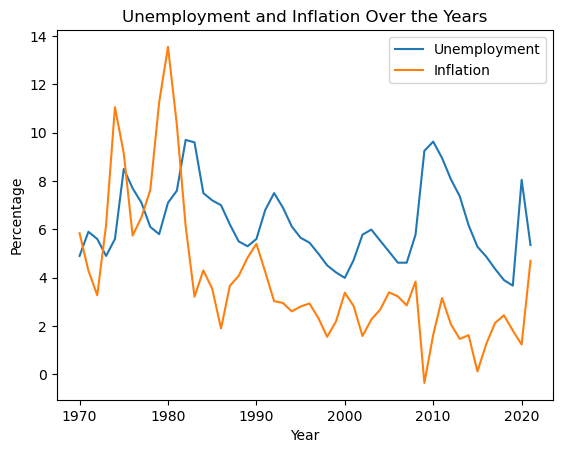

In [26]:
merged_table.to_pandas().plot(x='Year', y=['Unemployment', 'Inflation'], kind='line', title='Unemployment and Inflation Over the Years', ylabel='Percentage')
plt.show()